# **YOLO CATASTRO: Elementos en fachadas**

In [1]:
#@title Configuración ambiente YOLO

!git clone https://github.com/catastrodnp/YOLO_FACHADAS_CONSTRUCCIONES-
%cd '/content/YOLO_FACHADAS_CONSTRUCCIONES-'
!pip install -r requirements.txt

import ultralytics, gdown, os, glob, zipfile
import
from PIL import Image
import IPython.display as display

ultralytics.checks()

#Obtener el peso desde github
split_zip_files = glob.glob('/content/YOLO_FACHADAS_CONSTRUCCIONES-/weight/*.zip.0*')
split_zip_files.sort()

output_zip_path = '/content/weight.zip'
with open(output_zip_path, 'wb') as output_zip:
    for split_file in split_zip_files:
        with open(split_file, 'rb') as input_part:
            output_zip.write(input_part.read())

with zipfile.ZipFile(output_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/107.7 GB disk)


['/content/weights/best_kag_ep12.pt', '/content/weights/best_kag_ep40.pt']

In [2]:
#@title Parámetros y predicción YOLO

#Escoger una imagen que se quiera analizar
sample='https://d3s5pkt10pk3ga.cloudfront.net/resizedImages/original/site/fincaraiz_service/media/listing/66ae92d0-1cae-4757-b9bd-d15755897434/photos/66ae92d0-1cae-4757-b9bd-d15755897434_1_True_a0076f8f-27e9-4c1b-b79b-9f498a31de1b.jpg'

#Resolución escogida en pixeles para realizar el análisis
res=320
#Weight para realizar la predicción
weig='/content/weights/best_kag_ep40.pt'


#PREDICCIÓN YOLO
!yolo predict model=$weig source=$sample imgsz=$res

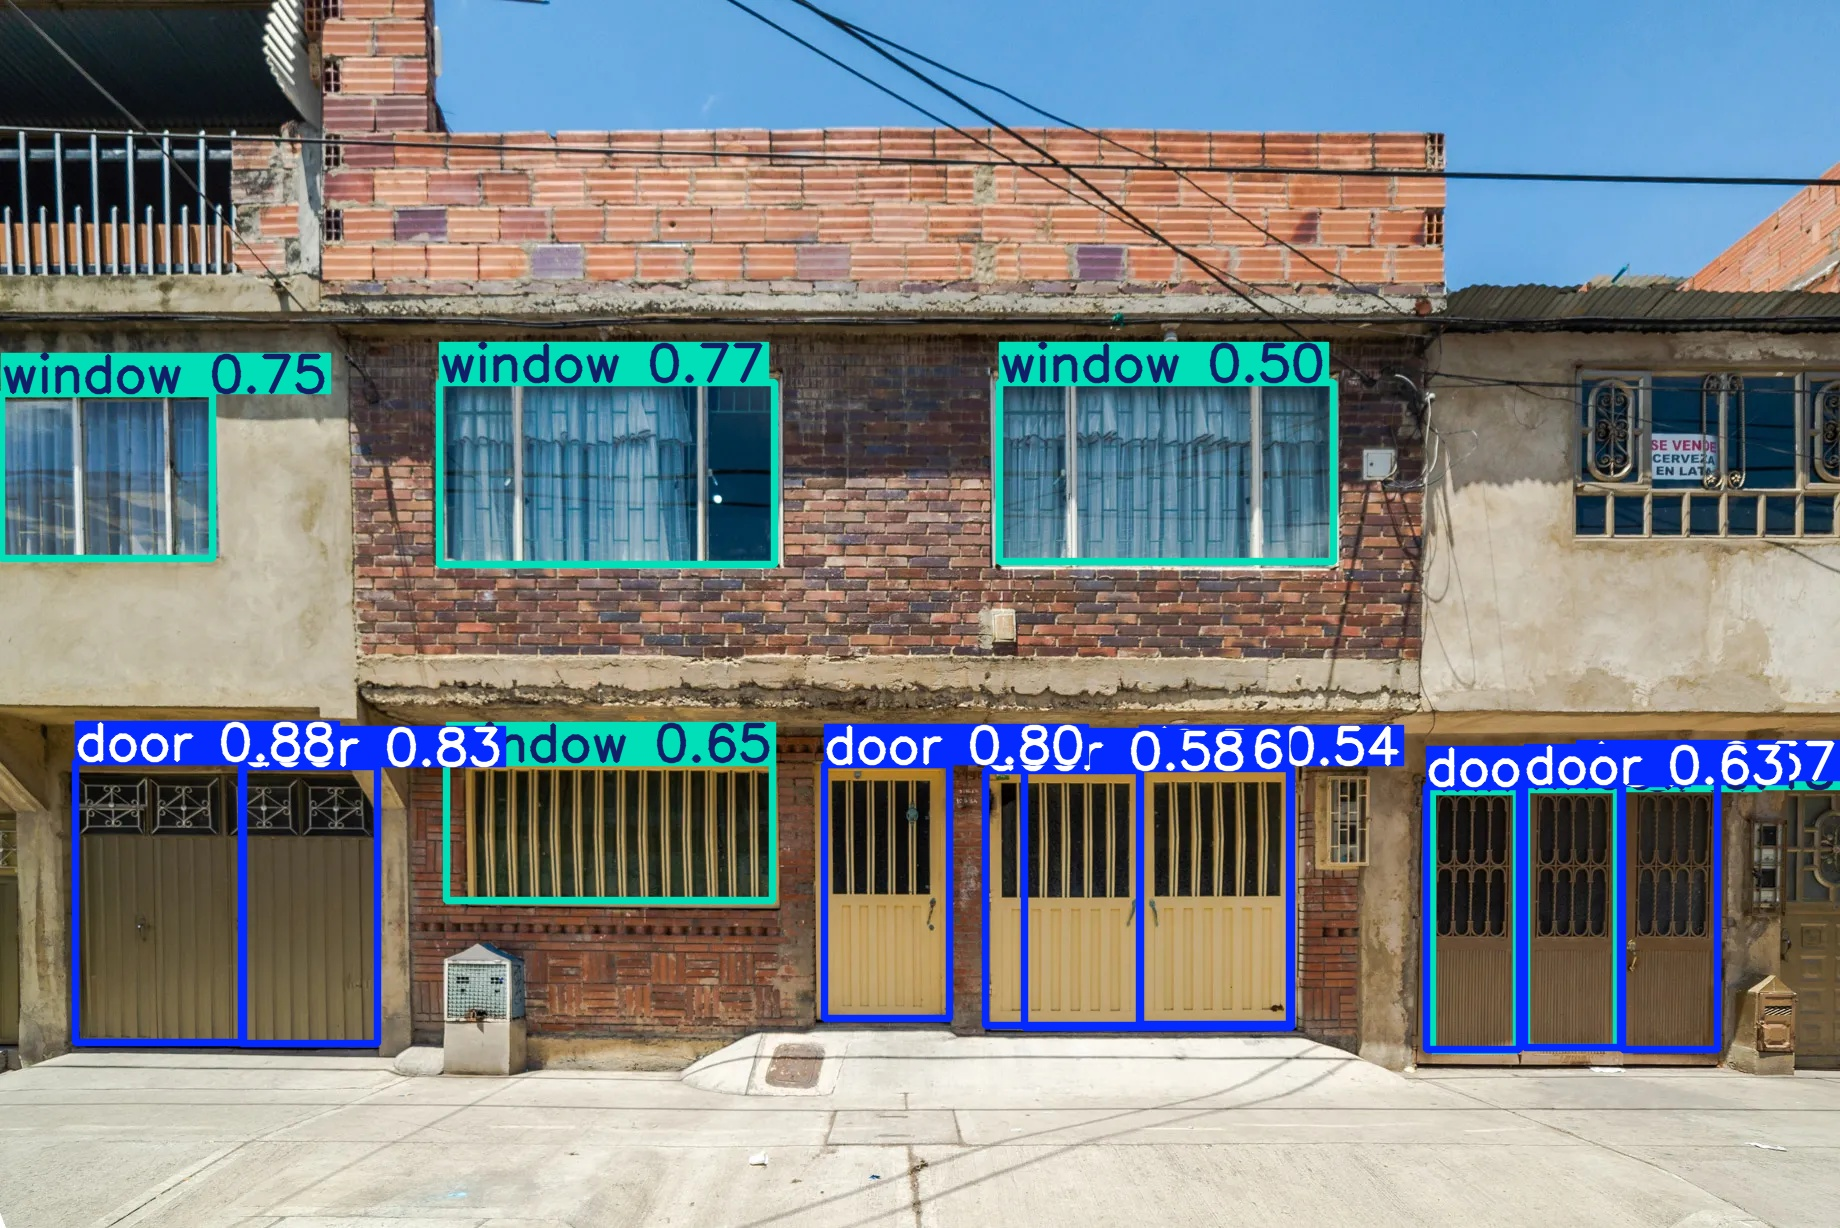

In [15]:
#@title Visualización resultados

# Carpeta con los resultados
carpeta_principal = '/content/runs'

# Todas las imágenes .jpg en la carpeta y subcarpetas
imagenes = glob.glob(f"{carpeta_principal}/**/*.jpg", recursive=True)

# Verifica si se encontraron imágenes
if imagenes:
    # Encuentra la imagen más reciente
    ultima_imagen = max(imagenes, key=os.path.getctime)

    # Abre y muestra la imagen
    img = Image.open(ultima_imagen)
    display.display(img)
else:
    print("No se encontraron imágenes en la carpeta especificada.")